<h1> Computing Sensitivity (Sobol') Indices For a 10-bar Truss Structure

In this notebook, we will use two different polynomial techniques for estimating the first and second order Sobol'  indices associated with a 10-bar statics truss structure, shown below.

<img src="data/truss.png" width="50%">

This notebook is a replication of a similar study carried out by Ghisu and Shahpar in [1]  (we use different values here). In total there are 15 uncertainties in this case study.
$$\begin{array}{ll} \hline
Uncertain \; parameter & Distribution \\ \hline
A_i \; (\text{for} \; i=1, \ldots, 10) & U[0.00009, 0.0011] \; m^2 \\ 
L  & U[0.90, 1.10] \; m \\ 
P_1  & U[72,000, 88,000] \; N \\
P_2  & U[90,000, 110,000] \; N \\
P_3  & U[90,000, 110,000] \; N \\
E  & U[90.1e9, 90.2e9] \; Pa \\
\hline
\end{array}$$
The prefix $U$ denotes a uniform distribution over the support. For a given choice of these variables (over their ranges), a finite element code is run to determine the displacement of point 2 in Figure. 

In [1]:
from equadratures import *
import numpy as np

As before, we begin by defining each parameter and its range using four points for each variable.

In [3]:
order_parameters = 3
A1 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A2 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A3 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A4 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A5 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A6 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A7 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A8 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A9 = Parameter(distribution='uniform', lower=0.0009, upper=0.0011, order=order_parameters)
A10 = Parameter(distribution='uniform',lower=0.0009, upper=0.0011, order=order_parameters)
L = Parameter(distribution='uniform',  lower=0.90, upper=1.10, order=order_parameters)
P1 = Parameter(distribution='uniform', lower=72000.0, upper=88000.0, order=order_parameters)
P2 = Parameter(distribution='uniform', lower=90000.0, upper=110000.0, order=order_parameters)
P3 = Parameter(distribution='uniform', lower=90000.0, upper=110000.0, order=order_parameters)
E = Parameter(distribution='uniform', lower=90.1E+9, upper=90.2E+9, order=order_parameters)
parameters = [A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, L, P1, P2, P3, E]

Now, a word on the costs of this simulation is in order. Trying to utilize a tensor grid would require $3^{15}=14,348,907$ evaluates of our finite element model---clearly out of the question! Instead we will use the polynomial least squares (i.e., *Polylsq*) and sparse grid integration (i.e., *Polyint*) modules. 

In [4]:
mybasis = Basis('Total order')
myPoly = Polylsq(parameters, mybasis, mesh='tensor', optimization='random', oversampling=2.0)

Now (and this is the important part), we wish to ascertain how many model evaluations will be required for computing these sensitivities. The objective is for these to be orders of magnitude lower than other methods for computing Sobol' indices.

In [5]:
print len(myPoly.quadraturePoints)

1632


Now, let us print these points out to a file, so they may be read-in by the finite element code. 

In [6]:
np.savetxt('data/truss_problem/quadrature_points.out', myPoly.quadraturePoints, delimiter=',') 

After running the finite element model, we saved the deflections in a file; we now call that file.

In [7]:
deflections = np.loadtxt('data/truss_problem/deflections.out')

In [8]:
myPoly.computeCoefficients(deflections)
Sleastsquares = myPoly.getStatistics()

We plot estimates of the first order Sobol' indices below, followed by estimates of the second order Sobol' indices.

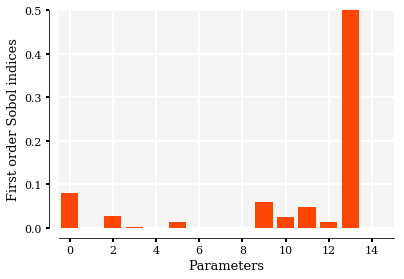

In [9]:
data = Sleastsquares.getSobol(1).values()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(0, len(data)):
    plt.bar(i,float(data[i]) , color='orangered')
plt.ylim([10**(-6), 1])
plt.xlabel('Parameters', fontsize=13)
plt.ylabel('First order Sobol indices', fontsize=13)
plt.xlim([-0.50, 15])
plt.ylim([0, 0.5])
adjust_spines(ax, ['left', 'bottom'])
plt.show()

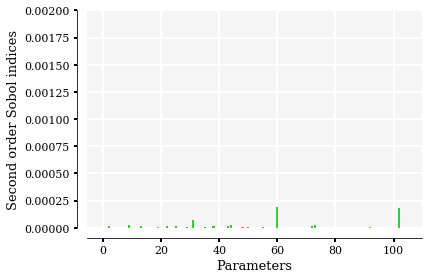

In [11]:
data = Sleastsquares.getSobol(2).values()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(0, len(data)):
    plt.bar(i,float(data[i]) , color='limegreen')
plt.ylim([10**(-6), 1])
plt.xlabel('Parameters', fontsize=13)
plt.ylabel('Second order Sobol indices', fontsize=13)
plt.ylim([0, 0.002])
adjust_spines(ax, ['left', 'bottom'])
plt.show()

We observe virtually no second order interactions, but strong first order effects.

<h3> References

1. Ghisu, T., Shahpar, S., (2017) "Towards affordable uncertainty quantification for industrial problems - part I: theory and validation", Proceedings of the ASME Turbo Expo 2017. 